Jonathan will introduce and do expressions (also show how to format sympy output for
presentation in notebook and use in papers).

Anupam will do calculus with quantum examples

Jonathan will conclude with linalg and quantum examples (also include Fisher information
calculation and lambdify)

- Anupam
  - Calculus
    - Symbolic integration
    - Limits
    - Orthogonality (maybe make a matrix with a loop)
  - Quantum mechanics
    - Hermite polynomials for fock-state wavefunctions
- Jonathan
  - Complex numbers
    - Show difficulty demonstrating an object is a phase
  - Exporting expressions
    - Displaying nicely in notebook
    - Creating floating-point functions
    - Saving
  - Linalg
    - Eigenvalues
    - State update (also series expansion and order truncation)

Anupam's outline for the lesson below:

Outline for Symbolic Algebra lesson
====================

- Introduction to symbolic algebra:
    - Numerical versus symbolic calculation with examples
    - Introduction to `sympy`
    - `sympy` requires symbolic variables to be declared before being used in an expression just as in regular programming

- Expressions:
    - Adding, multiplying expressions
    - Complex numbers: complex conjugation, absolute value, checking for unimodularity $|z| = 1$?
   
- Finding eigenvalues of matrices:
    - Pauli matrices
    - spin 1 matrices
    - Gell Mann matrices

- Calculus:
    - Differentiation
    - Integration
    - Limits
    - Orthogonality of functions: spherical Bessel functions, Hermite polynomials, spherical harmonics

- Quantum mechanics examples, with a theme of "what you did not do in your quantum mechanics courses"
    - Construction of angular momentum matrices for spin $\frac{1}{2}$, spin 1 using $J_z$, $J_+$, $J_-$
    - Loop over angular momentum matrices from $\frac{1}{2}$ to $\frac{7}{2}$
    - Harmonic oscillator expectation values using Hermite polynomials for somewhat large values of $n$
    - Hydrogen atom expectation values using Laguerre polynomial and spherical harmonics, for somewhat $n$
    - Calculating expectation values, probabilities and post measurement states for operators on Bell states

In addition to this material, I think we should include lambdification.

# Draft notebook

## Introduction to symbolic algebra

Don't do `from sympy import *` since we will want to use some functions,
like `sqrt`, from both a symbolic and a numeric library.

In [1]:
import sympy as sy
import numpy as np

Sometimes we have an exact expression that is corrupted by
the numerical imprecision of a library like `numpy`. For example,
consider $\sqrt{3}$:

In [2]:
np.sqrt(3)

1.7320508075688772

In [3]:
np.sqrt(3)**2 - 3

-4.4408920985006262e-16

In [4]:
sy.sqrt(3)

sqrt(3)

In [5]:
sy.sqrt(3)**2 - 3

0

`sympy` is also capable of displaying expressions in a more human-friendly
format.

In [6]:
sy.init_printing()

In [7]:
sy.sqrt(3)

The real power of `sympy` is the ability to manipulate variables. Some computer algebra
systems (CAS) allow the user to immediately input expressions with variables.

In [8]:
x + y

NameError: name 'x' is not defined

Since `sympy` is used within a full Python programming environment, we need to do a little
setup first and define some *Python* variables to function as our symbolic variables.

In [9]:
x, y, z = sy.symbols('x y z')
x + y

In [10]:
type(x)

sympy.core.symbol.Symbol

## Expressions

We can make all kinds of expressions in `sympy` using both arithmetic operators from Python
(to which `sympy` gives special meaning) and functions that `sympy` provides for us:

In [11]:
(x**2 + y**2 + z**2) / 2

In [12]:
sy.sin(x)**2 + sy.cos(x)**2

In [13]:
(x + y) * (x - y)

### Simplification

A lot of times we want to manipulate an expression without changing what it represents. `sympy`
has a variety of functions for doing this. `simplify` is the most generic:

In [14]:
sy.simplify(sy.sin(x)**2 + sy.cos(x)**2)

Sometimes `sympy` doesn't automatically know what we mean by "simple", so there are functions to
put expressions in particular forms:

In [15]:
sy.simplify((x + y) * (x - y))

In [16]:
sy.expand((x + y) * (x - y))

In [17]:
sy.simplify(x**2 - y**2)

In [18]:
sy.factor(x**2 - y**2)

See more examples in the tutorial section
[Simplification](http://docs.sympy.org/latest/tutorial/simplification.html).

### Example: checking a phase

Sometimes we want to verify properties of our expressions, e.g. show that the
magnitude of a complex phase is 1. Let's set up some real variables $a$ and $b$
for the real and imaginary parts of a complex number $a+ib$:

In [19]:
a, b = sy.symbols('a b', real=True)
a, b

In [20]:
c = a + sy.I*b
c

`sympy` knows that $a$ and $b$ are real, so they remain unchanged when we take their complex conjugates:

In [21]:
a.conjugate(), b.conjugate()

Let's express the phase of $a+bi$ using `sympy`:

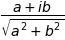

In [22]:
phase = sy.simplify(c/sy.sqrt(c * c.conjugate()))
phase

A complex phase $\omega$ has the property that $\omega\omega^*=1$. Let's see if
our expression satisfies that property:

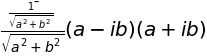

In [23]:
phase * phase.conjugate()

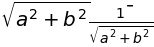

In [24]:
sy.simplify(phase * phase.conjugate())

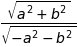

In [25]:
sy.Abs(phase)

`sympy` isn't realizing that $a^2+b^2$ is positive, and that therefore the conjugation doesn't do
anything. We can take `sympy` by the hand and manually point this out:

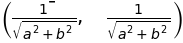

In [26]:
sub_pair = (sy.conjugate(1 / sy.sqrt(a**2 + b**2)), 1 / sy.sqrt(a**2 + b**2))
sub_pair

In [27]:
sy.simplify((phase * phase.conjugate()).subs(*sub_pair))

Sometimes you can force `sympy` to make simplifications that may note be justified
in general. It doesn't help here:

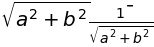

In [28]:
sy.powsimp(sy.simplify(phase * phase.conjugate()), force=True)

But it can help in situations like

In [29]:
sy.powsimp(x**z * y**z - (x*y)**z)

In [30]:
sy.powsimp(x**z * y**z - (x*y)**z, force=True)

### Displaying expressions nicely

Sometimes we want to display our expressions with a little more context that `sympy` spits out.
We can use the rich HTML rendering system of jupyter notebooks together with the `latex`
export functionality provided by `sympy` to make our notebooks legible.

In [31]:
from IPython.display import display, HTML

`display` is like `print`, but it takes advantage of your format's fancy display options. This
is what's called when you finish a cell with a line that has a lone expression on it (without
any assignment).

In [32]:
'Hello'

'Hello'

In [33]:
display('Hello')

'Hello'

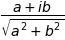

In [34]:
phase

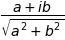

In [35]:
display(phase)

`latex` converts a `sympy` expression to LaTeX code:

In [36]:
sy.latex(phase)

'\\frac{a + i b}{\\sqrt{a^{2} + b^{2}}}'

If we want it rendered prettily, we need to wrap it in some math environment and explicitly use the
`HTML` function to format it for our notebook:

In [37]:
HTML('$$' + sy.latex(phase) + '$$')

This is a little more verbose, but it allows us greater flexibility:

In [38]:
HTML("$c=" + sy.latex(c) + "$")

We can even use advanced environments like align, but it will be helpful
to use raw string literals so we don't have to worry about all the `\`s:

In [39]:
HTML(r'\begin{align}|c|&=' + sy.latex(sy.simplify(sy.sqrt(c * c.conjugate()))) +
     r'\\ \angle c&=' + sy.latex(phase) + r'\end{align}')

You can also use this LaTeX in your paper. If you want to save the result of a calculation for
future manipulation, however, it's best not to use LaTeX (since it can be ambiguous). `sympy`'s
`srepr` function is better suited for this:

In [40]:
saved_phase = sy.srepr(phase)
saved_phase

"Mul(Add(Symbol('a', real=True), Mul(I, Symbol('b', real=True))), Pow(Add(Pow(Symbol('a', real=True), Integer(2)), Pow(Symbol('b', real=True), Integer(2))), Rational(-1, 2)))"

You can use `sympify` to convert an `srepr` string back to an expression:

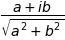

In [41]:
loaded_phase = sy.sympify(saved_phase)
loaded_phase

If you loaded an expression that has symbols you haven't defined yet,
you can get the new symbols from the expression in a list:

In [42]:
loaded_symbols = list(loaded_phase.free_symbols)
loaded_symbols

You can also use [pickle](https://docs.python.org/3/library/pickle.html). I prefer
`srepr`, since although it's increadibly verbose it is in principle interpretable by
a human or other program without needing Python.

## Anupam's sections

## Finding eigenvalues of matrices

### Tensor products

Let's say I want to know the eigenvalues of $a_H+a_H^\dagger$, where
$a_H=\sqrt{s^2+1}\,\sigma_-^{(1)}-s\,\sigma_+^{(2)}$.

First let's define some standard single-qubit operators:

In [44]:
ket_g = sy.Matrix([0, 1])
ket_e = sy.Matrix([1, 0])
Id = sy.eye(2)
sm = ket_g * ket_e.H
sp = sm.H

We need a way to deal with tensor product structure for $\sigma_\pm^{(n)}$.
Fortunately the `physics.quantum` module provides support for this:

In [45]:
from sympy.physics.quantum import TensorProduct

In [46]:
sm1 = TensorProduct(sm, Id)
sp1 = TensorProduct(sp, Id)
sm2 = TensorProduct(Id, sm)
sp2 = TensorProduct(Id, sp)

In [47]:
s = sy.symbols('s', positive=True)
aH = (sy.sqrt(s**2 + 1)*sm1 - s*sp2)
XH = aH + aH.H
HTML(r'$a_H+a_H^\dagger=' + sy.latex(XH) + '$')

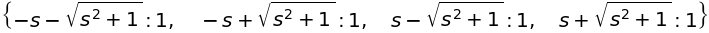

In [48]:
XH.eigenvals()

In [51]:
eigdecomp = XH.eigenvects()

In [54]:
eigvects = [sy.simplify(element[2][0]) for element in eigdecomp]
eigvects

⎡⎡-1⎤, ⎡1⎤, ⎡1 ⎤, ⎡-1⎤⎤
⎢⎢  ⎥  ⎢ ⎥  ⎢  ⎥  ⎢  ⎥⎥
⎢⎢-1⎥  ⎢1⎥  ⎢-1⎥  ⎢1 ⎥⎥
⎢⎢  ⎥  ⎢ ⎥  ⎢  ⎥  ⎢  ⎥⎥
⎢⎢1 ⎥  ⎢1⎥  ⎢-1⎥  ⎢-1⎥⎥
⎢⎢  ⎥  ⎢ ⎥  ⎢  ⎥  ⎢  ⎥⎥
⎣⎣1 ⎦  ⎣1⎦  ⎣1 ⎦  ⎣1 ⎦⎦

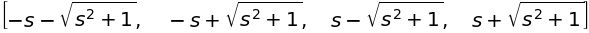

In [55]:
eigvals = [element[0] for element in eigdecomp]
eigvals

### State update

Suppose we have Kraus operators $K_\pm=\frac{1}{2}(I\pm\epsilon\sigma_z)$,
and we want to know what our updated state

\begin{align}
    \rho_\pm&=\frac{K_\pm\rho K_\pm^\dagger}{\operatorname{tr}[K_\pm^\dagger K_\pm]}
\end{align}

will look like.

First let's define Pauli operators

\begin{align}
    \sigma_x&=\sigma_++\sigma_- \\
    \sigma_y&=-i\sigma_++i\sigma_- \\
    \sigma_z&=I-2\sigma_-\sigma_+
\end{align}

In [81]:
X = sp + sm
Y = -sy.I * sp + sy.I*sm
Z = Id - 2 * sm * sp
X, Y, Z

⎛⎡0  1⎤, ⎡0  -ⅈ⎤, ⎡1  0 ⎤⎞
⎜⎢    ⎥  ⎢     ⎥  ⎢     ⎥⎟
⎝⎣1  0⎦  ⎣ⅈ  0 ⎦  ⎣0  -1⎦⎠

Then build $\rho$ and $K_\pm$ out of these operators.

In [83]:
rho = (Id + x*X + y*Y + z*Z) / 2
rho

⎡ z   1   x   ⅈ⋅y⎤
⎢ ─ + ─   ─ - ───⎥
⎢ 2   2   2    2 ⎥
⎢                ⎥
⎢x   ⅈ⋅y    z   1⎥
⎢─ + ───  - ─ + ─⎥
⎣2    2     2   2⎦

In [84]:
eps = sy.symbols('epsilon', positive=True)
Kp = (Id + eps * Z) / 2
Km = (Id - eps * Z) / 2
Kp, Km

⎛⎡ε   1         ⎤  ⎡  ε   1       ⎤⎞
⎜⎢─ + ─     0   ⎥, ⎢- ─ + ─    0  ⎥⎟
⎜⎢2   2         ⎥  ⎢  2   2       ⎥⎟
⎜⎢              ⎥  ⎢              ⎥⎟
⎜⎢         ε   1⎥  ⎢         ε   1⎥⎟
⎜⎢  0    - ─ + ─⎥  ⎢   0     ─ + ─⎥⎟
⎝⎣         2   2⎦  ⎣         2   2⎦⎠

Finally, calculate the state update:

In [87]:
rho_p = Kp * rho * Kp / sy.trace(Kp * Kp * rho)
rho_p

⎡                   2                                                         
⎢            ⎛ε   1⎞  ⎛z   1⎞                   ⎛  ε   1⎞ ⎛ε   1⎞ ⎛x   ⅈ⋅y⎞   
⎢            ⎜─ + ─⎟ ⋅⎜─ + ─⎟                   ⎜- ─ + ─⎟⋅⎜─ + ─⎟⋅⎜─ - ───⎟   
⎢            ⎝2   2⎠  ⎝2   2⎠                   ⎝  2   2⎠ ⎝2   2⎠ ⎝2    2 ⎠   
⎢───────────────────────────────────────  ────────────────────────────────────
⎢         2                    2                   2                    2     
⎢⎛  ε   1⎞  ⎛  z   1⎞   ⎛ε   1⎞  ⎛z   1⎞  ⎛  ε   1⎞  ⎛  z   1⎞   ⎛ε   1⎞  ⎛z  
⎢⎜- ─ + ─⎟ ⋅⎜- ─ + ─⎟ + ⎜─ + ─⎟ ⋅⎜─ + ─⎟  ⎜- ─ + ─⎟ ⋅⎜- ─ + ─⎟ + ⎜─ + ─⎟ ⋅⎜─ +
⎢⎝  2   2⎠  ⎝  2   2⎠   ⎝2   2⎠  ⎝2   2⎠  ⎝  2   2⎠  ⎝  2   2⎠   ⎝2   2⎠  ⎝2  
⎢                                                                             
⎢                                                            2                
⎢      ⎛  ε   1⎞ ⎛ε   1⎞ ⎛x   ⅈ⋅y⎞                  ⎛  ε   1⎞  ⎛  z   1⎞      
⎢      ⎜- ─ + ─⎟⋅⎜─ + ─⎟⋅⎜─ + ───⎟                  

In [88]:
sy.simplify(rho_p)

⎡                 2                                                      ⎤
⎢         -(ε + 1) ⋅(z + 1)                (ε - 1)⋅(ε + 1)⋅(x - ⅈ⋅y)     ⎥
⎢───────────────────────────────────  ───────────────────────────────────⎥
⎢       2                  2                 2                  2        ⎥
⎢(ε - 1) ⋅(z - 1) - (ε + 1) ⋅(z + 1)  (ε - 1) ⋅(z - 1) - (ε + 1) ⋅(z + 1)⎥
⎢                                                                        ⎥
⎢                                                      2                 ⎥
⎢     (ε - 1)⋅(ε + 1)⋅(x + ⅈ⋅y)                 (ε - 1) ⋅(z - 1)         ⎥
⎢───────────────────────────────────  ───────────────────────────────────⎥
⎢       2                  2                 2                  2        ⎥
⎣(ε - 1) ⋅(z - 1) - (ε + 1) ⋅(z + 1)  (ε - 1) ⋅(z - 1) - (ε + 1) ⋅(z + 1)⎦

If $\epsilon$ is small, we might only want to keep track of terms up to a certain
order in $\epsilon$. Let's expand the denominator to second order in $\epsilon$
using `series`:

In [97]:
sy.series(1 / sy.trace(Kp * Kp * rho), eps, n=3)

The numerator is already only second order in $\epsilon$:

In [99]:
sy.expand(Kp * rho * Kp)

⎡ 2      2                         2        2              ⎤
⎢ε ⋅z   ε    ε⋅z   ε   z   1      ε ⋅x   ⅈ⋅ε ⋅y   x   ⅈ⋅y  ⎥
⎢──── + ── + ─── + ─ + ─ + ─    - ──── + ────── + ─ - ───  ⎥
⎢ 8     8     4    4   8   8       8       8      8    8   ⎥
⎢                                                          ⎥
⎢    2        2                  2      2                  ⎥
⎢   ε ⋅x   ⅈ⋅ε ⋅y   x   ⅈ⋅y     ε ⋅z   ε    ε⋅z   ε   z   1⎥
⎢ - ──── - ────── + ─ + ───   - ──── + ── + ─── - ─ - ─ + ─⎥
⎣    8       8      8    8       8     8     4    4   8   8⎦

When we multiply the two terms together, the $\mathcal{O}(\epsilon^3)$ term swallows up
higher order products automatically:

In [98]:
sy.expand(sy.series(1 / sy.trace(Kp * Kp * rho), eps, n=3) * Kp * rho * Kp)

⎡                1   z          2      2        2  3    ⎛ 3⎞                  
⎢                ─ + ─ + ε - ε⋅z  - 2⋅ε ⋅z + 2⋅ε ⋅z  + O⎝ε ⎠                  
⎢                2   2                                                        
⎢                                                                             
⎢ⅈ⋅y   x                        2          2    2    2        2    2    ⎛ 3⎞  
⎢─── + ─ - ⅈ⋅ε⋅y⋅z - ε⋅x⋅z - ⅈ⋅ε ⋅y + 2⋅ⅈ⋅ε ⋅y⋅z  - ε ⋅x + 2⋅ε ⋅x⋅z  + O⎝ε ⎠  
⎣ 2    2                                                                      

  ⅈ⋅y   x                        2          2    2    2        2    2    ⎛ 3⎞⎤
- ─── + ─ + ⅈ⋅ε⋅y⋅z - ε⋅x⋅z + ⅈ⋅ε ⋅y - 2⋅ⅈ⋅ε ⋅y⋅z  - ε ⋅x + 2⋅ε ⋅x⋅z  + O⎝ε ⎠⎥
   2    2                                                                    ⎥
                                                                             ⎥
                 1   z          2      2        2  3    ⎛ 3⎞                 ⎥
                 ─ - ─ - ε + ε⋅z  + 2⋅ε ⋅z - 2⋅ε ⋅z

In [101]:
sy.trace(sy.expand(sy.series(1 / sy.trace(Kp * Kp * rho), eps, n=3) * Kp * rho * Kp))